참고 : https://datascienceschool.net/view-notebook/465066ac92ef4da3b0aba32f76d9750a/

In [2]:
from datetime import date, datetime, timedelta
import pandas as pd
pd.options.display.max_rows=10
df = pd.read_csv('/home/yahwang/kaggle/bike/bike_train.csv')

# 데이터 프레임 활용

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# 날짜형식 데이터는 로드 시 문자열로 인식된다.
df.datetime.head()

0    2011-01-01 00:00:00
1    2011-01-01 01:00:00
2    2011-01-01 02:00:00
3    2011-01-01 03:00:00
4    2011-01-01 04:00:00
Name: datetime, dtype: object

## object(문자열) 컬럼을 datetime 타입으로 변환하기

#### 1. 컬럼에 pd.to_datetime 함수 적용 ( with format 파라미터 )
    현재 데이터에 유지하는 포맷을 명시하여 datetime 타입으로 변환해야 한다.

In [5]:
# datetime 형식으로 입력된 데이터는 바로 변환
df['datetime'] = pd.to_datetime(df['datetime'])
df.datetime.head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [6]:
# 특정한 형식인 경우는 format을 사용하여 변환 ( 현재 입력된 형식을 명시해야 한다. )
## 연도/월/일 시:분 데이터 변환
test_date = pd.DataFrame({'day': ['18/11/15 17:00', '17/08/13 17:30']})
print('잘못된 변환\n', pd.to_datetime(test_date['day']))
print('정확한 변환\n', pd.to_datetime(test_date['day'], format='%y/%m/%d %H:%M'))

잘못된 변환
 0   2015-11-18 17:00:00
1   2013-08-17 17:30:00
Name: day, dtype: datetime64[ns]
정확한 변환
 0   2018-11-15 17:00:00
1   2017-08-13 17:30:00
Name: day, dtype: datetime64[ns]


#### 2. 파일을 읽을 때 datetime 컬럼을 지정하는 방법

In [7]:
# format이 일반적이지 않은 경우, custom하게 format 지정이 필요
df2 = pd.read_csv('/home/yahwang/kaggle/bike/bike_train.csv', parse_dates=['datetime'])

## datetime 타입 컬럼 활용

#### .dt 활용 - 기본 사용법을 컬럼에 적용
    원하는 값을 추출해 새로운 컬럼을 만들 때 유용하다.

In [8]:
# weekday, quarter, month, month_name, day_name 등등 가능
df.datetime.dt.date
## datetime은 없음

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
10881    2012-12-19
10882    2012-12-19
10883    2012-12-19
10884    2012-12-19
10885    2012-12-19
Name: datetime, Length: 10886, dtype: object

In [9]:
# strftime
df.datetime.dt.strftime('%y/%m/%d')

0        11/01/01
1        11/01/01
2        11/01/01
3        11/01/01
4        11/01/01
           ...   
10881    12/12/19
10882    12/12/19
10883    12/12/19
10884    12/12/19
10885    12/12/19
Name: datetime, Length: 10886, dtype: object

In [10]:
# 쿼리 활용
## datetime은 문자열로 비교할 수 없다.
df.loc[(df['datetime'].dt.month==2) & (df['datetime'].dt.day==19)]
df[ df['datetime'].dt.date == date(2012,2,19) ] # date 타입으로 비교

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6306,2012-02-19 00:00:00,1,0,0,2,13.94,15.150,39,23.9994,9,65,74
6307,2012-02-19 01:00:00,1,0,0,2,13.12,15.150,39,16.9979,10,62,72
6308,2012-02-19 02:00:00,1,0,0,2,12.30,14.395,36,19.0012,3,45,48
6309,2012-02-19 03:00:00,1,0,0,2,12.30,14.395,36,15.0013,3,12,15
6310,2012-02-19 04:00:00,1,0,0,2,11.48,12.880,41,26.0027,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6325,2012-02-19 19:00:00,1,0,0,2,12.30,14.395,52,16.9979,18,101,119
6326,2012-02-19 20:00:00,1,0,0,2,12.30,14.395,52,19.0012,22,81,103
6327,2012-02-19 21:00:00,1,0,0,3,10.66,12.880,65,11.0014,3,33,36
6328,2012-02-19 22:00:00,1,0,0,3,9.84,12.880,75,6.0032,8,47,55


## shift 함수 활용
    shift는 해당 기간만큼 데이터를 옮긴다.

#### 기간이 의미있는 데이터에서 각 컬럼 간 시작점을 통일하여 데이터를 비교할 수 있다.

In [27]:
date_df = pd.DataFrame({'date': pd.date_range(start='2018-11-10', end='2018-11-20'),'col1':[None]*2+[10,20,30,15,8,40,3,22]+[None], 'col2':[None]*5+[50,30,20,10]+[None]*2})
date_df.set_index('date', inplace=True)
date_df

,col1,col2
date,,
2018-11-10,NaN,NaN
2018-11-11,NaN,NaN
2018-11-12,10.0,NaN
2018-11-13,20.0,NaN
2018-11-14,30.0,NaN
...,...,...
2018-11-16,8.0,30.0
2018-11-17,40.0,20.0
2018-11-18,3.0,10.0


#### Series의 함수를 통해 첫번째로 값이 존재하는 날을 파악할 수 있다.

In [28]:
first_valid = date_df.apply(pd.Series.first_valid_index)
first_valid

col1   2018-11-12
col2   2018-11-15
dtype: datetime64[ns]

index 시작점을 기준으로 차이일 수를 확인하고 shift 함수에 적용한다.

In [29]:
shift_date = first_valid-date_df.index.min()
shift_date

col1   2 days
col2   5 days
dtype: timedelta64[ns]

In [30]:
date_df.index = (date_df.index - date_df.index.min()).days # 일 수를 표시하기 위한 index
date_df.col1 = date_df.col1.shift(-shift_date[0].days) # 역수로 shift
date_df.col2 = date_df.col2.shift(-shift_date[1].days) # 역수로 shift

In [31]:
# 데이터가 앞으로 옮겨진 것을 확인할 수 있다.
date_df

,col1,col2
date,,
0,10.0,50.0
1,20.0,30.0
2,30.0,20.0
3,15.0,10.0
4,8.0,NaN
...,...,...
6,3.0,NaN
7,22.0,NaN
8,NaN,NaN


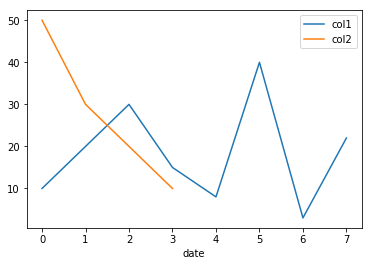

In [32]:
# col2는 3일 만에 데이터가 끝나고 col1은 7일 까지 존재하고 시각적으로 확인
date_df.plot(kind='line', y=['col1','col2'])